# Introduction

The purpose of this analysis is to:

- determine the average price of diamonds between 6:15 PM and 7:35 PM in 5-minute windows.

- determine the price distribution of diamonds purchased during these hours.

- determine the most popular diamonds purchased during these hours.

## 1. Loading data and libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F
from pyspark.sql.functions import col

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 52, Finished, Available, Finished)

The data is loaded into SparkDataFrame, which allows for aggregation through distributed computations.

In [51]:
df = spark.read.table("ag.summary")

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 53, Finished, Available, Finished)

Filtering data to narrow down the time period

In [52]:
df = df.filter(
    (col("WindowEnd") >= "2025-10-29 18:15:00") & 
    (col("WindowEnd") <= "2025-10-29 19:35:00")
)

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 54, Finished, Available, Finished)

Preview of obtained data.

In [53]:
display(df)

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 55, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, cc0f13fd-ee7f-4877-8813-33dbb25d9282)

## 2. Grouping data by time windows

To obtain the statistics required for the task, the data must be grouped by region and by diamond within each time window. Therefore, two tables are created.

In [54]:
region_perf = (
    df.groupBy("WindowEnd", "most_popular_region")
      .agg(F.avg("avg_price").alias("mean_price"),
           F.count("*").alias("record_count"))
)


diamond_perf = (
    df.groupBy("WindowEnd", "most_popular_diamond")
      .agg(F.avg("avg_price").alias("mean_price"),
           F.count("*").alias("record_count"))
)


region_pd = region_perf.toPandas()
diamond_pd = diamond_perf.toPandas()

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 56, Finished, Available, Finished)

The tables are smaller after grouping, so they were moved to Pandas Data Frame to facilitate visualization.

Due to the critical role of the WindowEnd column, duplicates should be removed from it.

In [55]:
region_pd = region_pd.drop_duplicates(subset=['WindowEnd'])

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 57, Finished, Available, Finished)

In [56]:
region_pd

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 58, Finished, Available, Finished)

,WindowEnd,most_popular_region,mean_price,record_count
0,2025-10-29 18:15:00,East Asia,15975.000000,2
1,2025-10-29 18:20:00,North America,15571.428571,6
3,2025-10-29 18:25:00,EU,15133.333333,4
4,2025-10-29 18:30:00,North America,13119.444444,20
5,2025-10-29 19:05:00,EU,12630.612245,6
6,2025-10-29 19:30:00,EU,11000.000000,1
7,2025-10-29 18:35:00,EU,11000.000000,1
8,2025-10-29 19:35:00,EU,15013.636364,7


In [57]:
diamond_pd = diamond_pd.drop_duplicates(subset=['WindowEnd'])

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 59, Finished, Available, Finished)

In [58]:
diamond_pd

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 60, Finished, Available, Finished)

,WindowEnd,most_popular_diamond,mean_price,record_count
0,2025-10-29 18:20:00,Polaris,15571.428571,3
2,2025-10-29 18:15:00,Nova,15975.000000,2
3,2025-10-29 18:30:00,Nova,13119.444444,10
5,2025-10-29 18:25:00,Nova,15133.333333,4
7,2025-10-29 19:05:00,Sirius,12630.612245,2
10,2025-10-29 19:30:00,Celestia,11000.000000,1
11,2025-10-29 18:35:00,Celestia,11000.000000,1
12,2025-10-29 19:35:00,Nova,15013.636364,7


## 3. Display the required charts and statistics

For correct display, you must convert the date to string format and sort the tables.

In [59]:
region_pd["WindowEnd"] = region_pd["WindowEnd"].astype(str)
region_pd = region_pd.sort_values("WindowEnd")

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 61, Finished, Available, Finished)

After transformations, a graph showing the average price in each time window was obtained.

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 62, Finished, Available, Finished)

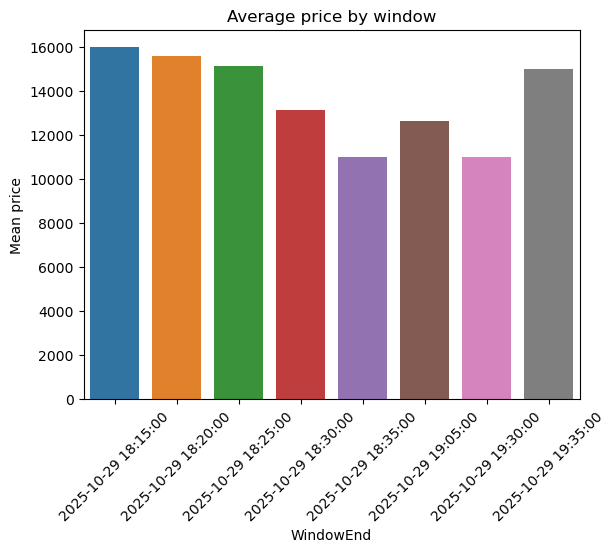

In [60]:
sns.barplot(data=region_pd, x="WindowEnd", y="mean_price")
plt.title("Average price by window")
plt.ylabel("Mean price")
plt.xticks(rotation=45)
plt.show()

The next chart required for analysis is a boxplot showing the median and quantiles of price.

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 63, Finished, Available, Finished)

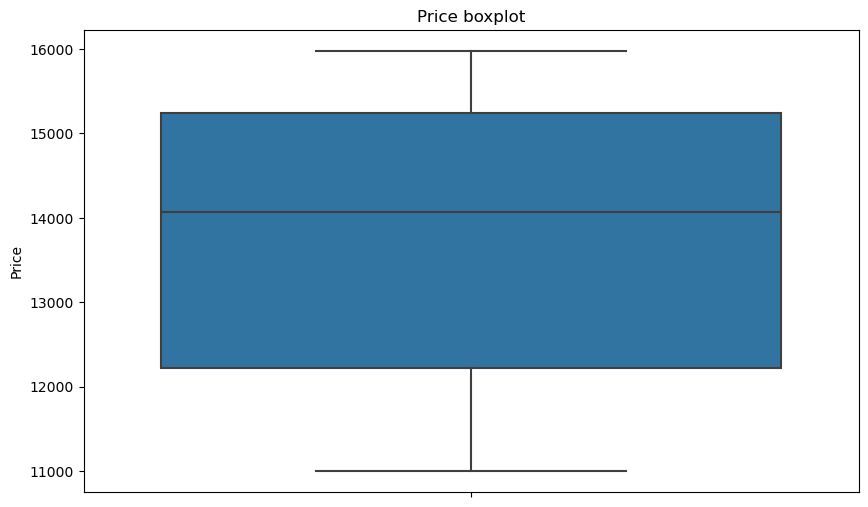

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data=diamond_pd,  y="mean_price")
plt.title("Price boxplot")
plt.ylabel("Price")
plt.show()


The last required chart is a chart of the most popular diamonds purchased between 6:15 PM and 7:35 PM.

StatementMeta(, c3d493ee-7af8-4ae4-826c-684cdbe2bb08, 64, Finished, Available, Finished)

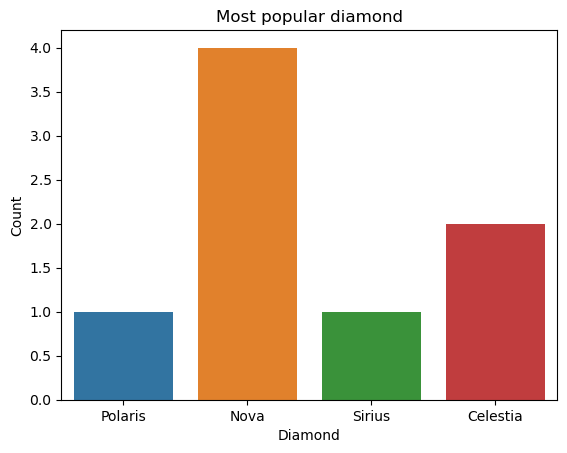

In [62]:

sns.countplot(diamond_pd, x="most_popular_diamond")
plt.title("Most popular diamond")
plt.xlabel("Diamond")
plt.ylabel("Count")
plt.show()


# Summary

- It's clear that between 6:15 and 6:25 PM, the average price of diamonds purchased is high, but then decreases, remaining at this low until 7:10 PM. It then begins to rise, reaching a high level again around 7:30 PM.

- Diamonds purchased between 6:15 and 7:35 PM have a median price of just over 14,000 PLN. Most diamonds purchased during this time are valued between 12,500 PLN and approximately 15,200 PLN.

- The most popular diamond purchased during this time is the Nova, followed by Celestia. Transactions on Polaris and Sirius were much smaller.